<a href="https://colab.research.google.com/github/yenngoc1809/edm-student-prediction/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.utils import resample
from sklearn.preprocessing import OrdinalEncoder



In [ ]:
file_path = "/content/Student Insomnia and Educational Outcomes Dataset_version-2.csv"
df = pd.read_csv(file_path)

In [ ]:
df

,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51:15,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52:21,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53:00,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53:25,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,12/15/2024 6:08:02,Graduate student,Female,Often (5-6 times a week),More than 8 hours,Every night,Very good,Often,Always,Sometimes (1-2 times a week),Severe impact,Every night,Every day,Often (5-6 times a week),Extremely high stress,Average
992,12/15/2024 6:08:09,Graduate student,Female,Rarely (1-2 times a week),6-7 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Never,Rarely (1-2 times a week),Low stress,Good
993,12/15/2024 6:08:30,Third year,Female,Never,More than 8 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Rarely (1-2 times a month),No impact,Never,Often (5-6 times a week),Rarely (1-2 times a week),High stress,Average
994,12/15/2024 6:08:31,Third year,Male,Sometimes (3-4 times a week),Less than 4 hours,Never,Average,Never,Rarely,Often (3-4 times a week),Major impact,Sometimes (3-4 times a week),Rarely (1-2 times a week),Every day,Extremely high stress,Excellent


In [ ]:
import pandas as pd
import json
import joblib
from sklearn.preprocessing import OrdinalEncoder

# Load data
df = pd.read_csv("Student Insomnia and Educational Outcomes Dataset_version-2.csv")
df = df.drop(columns=["Timestamp"])  # nếu có cột Timestamp

# Rename columns
df.columns = [
    "Year_of_Study", "Gender", "Difficulty_Falling_Asleep", "Sleep_Hours",
    "Wakeup_Difficulty", "Sleep_Quality", "Concentration_Problems",
    "Daytime_Fatigue", "Missed_Classes", "Impact_on_Deadlines",
    "Device_Use_Before_Sleep", "Caffeine_Consumption", "Physical_Activity",
    "Stress_Levels", "Academic_Performance"
]

# Save feature columns
feature_cols = df.columns.drop('Academic_Performance').tolist()
json.dump(feature_cols, open('columns.json', 'w'))

# Define orders
orders = [
    ['First year', 'Second year', 'Third year', 'Graduate student'],
    ['Male', 'Female'],
    ['Never','Rarely (1-2 times a week)','Sometimes (3-4 times a week)','Often (5-6 times a week)','Every night'],
    ['Less than 4 hours','4-5 hours','6-7 hours','7-8 hours','More than 8 hours'],
    ['Never','Rarely (1-2 times a week)','Sometimes (3-4 times a week)','Often (5-6 times a week)','Every night'],
    ['Very poor','Poor','Average','Good','Very good'],
    ['Never','Rarely','Sometimes','Often','Always'],
    ['Never','Rarely','Sometimes','Often','Always'],
    ['Never','Rarely (1-2 times a month)','Sometimes (1-2 times a week)','Often (3-4 times a week)','Always'],
    ['No impact','Minor impact','Moderate impact','Major impact','Severe impact'],
    ['Never','Rarely (1-2 times a week)','Sometimes (3-4 times a week)','Often (5-6 times a week)','Every night'],
    ['Never','Rarely (1-2 times a week)','Sometimes (3-4 times a week)','Often (5-6 times a week)','Every day'],
    ['Never','Rarely (1-2 times a week)','Sometimes (3-4 times a week)','Often (5-6 times a week)','Every day'],
    ['No stress','Low stress','High stress','Extremely high stress']
]

# Encode
encoder = OrdinalEncoder(categories=orders,
                         handle_unknown='use_encoded_value',
                         unknown_value=-1)
df[feature_cols] = encoder.fit_transform(df[feature_cols])

# Transform target
df["Academic_Performance"] = df["Academic_Performance"].apply(
    lambda x: 1 if x in ["Poor", "Below Average"] else 0
)

# Save encoder
joblib.dump(encoder, "encoder.pkl")


['encoder.pkl']

In [ ]:
df.head()
df = df.drop(columns=["Timestamp"])  # Drop the timestamp column

In [ ]:
summary_table = pd.DataFrame({
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "Missing %": (df.isnull().sum() / len(df) * 100).round(2)
    })

summary_table

,Data Type,Missing Values,Missing %
1. What is your year of study?,object,0,0.0
2. What is your gender?,object,0,0.0
3. How often do you have difficulty falling asleep at night?,object,0,0.0
"4. On average, how many hours of sleep do you get on a typical day?",object,0,0.0
5. How often do you wake up during the night and have trouble falling back asleep?,object,0,0.0
6. How would you rate the overall quality of your sleep?,object,0,0.0
7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,object,0,0.0
"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?",object,0,0.0
"9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",object,0,0.0
10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,object,0,0.0


In [ ]:
import pandas as pd
import json
import joblib
from sklearn.preprocessing import OrdinalEncoder

# Set column names
df.columns = [
    "Year_of_Study", "Gender", "Difficulty_Falling_Asleep", "Sleep_Hours",
    "Wakeup_Difficulty", "Sleep_Quality", "Concentration_Problems",
    "Daytime_Fatigue", "Missed_Classes", "Impact_on_Deadlines",
    "Device_Use_Before_Sleep", "Caffeine_Consumption", "Physical_Activity",
    "Stress_Levels", "Academic_Performance"
]

# Save only feature column names for the web app (exclude target)
feature_cols = df.columns.drop('Academic_Performance').tolist()
json.dump(feature_cols, open('columns.json', 'w'))

# Define orders including Gender as nominal (order here doesn't imply ranking)
orders = [
    ['First year', 'Second year', 'Third year', 'Graduate student'],  # Year_of_Study
    ['Male', 'Female'],  # Gender
    ['Never', 'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)', 'Often (5-6 times a week)', 'Every night'],  # Difficulty_Falling_Asleep
    ['Less than 4 hours', '4-5 hours', '6-7 hours', '7-8 hours', 'More than 8 hours'],  # Sleep_Hours
    ['Never', 'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)', 'Often (5-6 times a week)', 'Every night'],  # Wakeup_Difficulty
    ['Very poor', 'Poor', 'Average', 'Good', 'Very good'],  # Sleep_Quality
    ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],  # Concentration_Problems
    ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],  # Daytime_Fatigue
    ['Never', 'Rarely (1-2 times a month)', 'Sometimes (1-2 times a week)', 'Often (3-4 times a week)', 'Always'],  # Missed_Classes
    ['No impact', 'Minor impact', 'Moderate impact', 'Major impact', 'Severe impact'],  # Impact_on_Deadlines
    ['Never', 'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)', 'Often (5-6 times a week)', 'Every night'],  # Device_Use_Before_Sleep
    ['Never', 'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)', 'Often (5-6 times a week)', 'Every day'],  # Caffeine_Consumption
    ['Never', 'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)', 'Often (5-6 times a week)', 'Every day'],  # Physical_Activity
    ['No stress', 'Low stress', 'High stress', 'Extremely high stress']  # Stress_Levels
]

# Encode all 14 categorical features including Gender
encoded_columns = feature_cols  # all features
encoder = OrdinalEncoder(
    categories=orders,
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

df[encoded_columns] = encoder.fit_transform(df[encoded_columns])

# Save the encoder for later use in the web app
joblib.dump(encoder, 'encoder.pkl')


['encoder.pkl']

In [ ]:
df.columns = [
    "Year_of_Study", "Gender", "Difficulty_Falling_Asleep", "Sleep_Hours",
    "Wakeup_Difficulty", "Sleep_Quality", "Concentration_Problems",
    "Daytime_Fatigue", "Missed_Classes", "Impact_on_Deadlines",
    "Device_Use_Before_Sleep", "Caffeine_Consumption", "Physical_Activity",
    "Stress_Levels", "Academic_Performance"
]

In [ ]:
summary_table

,Data Type,Missing Values,Missing %
1. What is your year of study?,object,0,0.0
2. What is your gender?,object,0,0.0
3. How often do you have difficulty falling asleep at night?,object,0,0.0
"4. On average, how many hours of sleep do you get on a typical day?",object,0,0.0
5. How often do you wake up during the night and have trouble falling back asleep?,object,0,0.0
6. How would you rate the overall quality of your sleep?,object,0,0.0
7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,object,0,0.0
"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?",object,0,0.0
"9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",object,0,0.0
10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,object,0,0.0


In [ ]:
# def investigate_ordinal_data(df):
#     result = {}

#     for col in df.columns:

#         # Plot distribution
#         plt.figure(figsize=(6, 4))
#         sns.countplot(x=df[col])
#         plt.title(f"Distribution of {col}")
#         plt.xticks(rotation=45)
#         plt.show()

#     return pd.DataFrame(result).T  # Convert dictionary to DataFrame

# # Example usage

# investigate_ordinal_data = investigate_ordinal_data(df)
# investigate_ordinal_data


In [ ]:
def investigate_ordinal_data2(df):
    result = {}

    for col in df.columns:
        unique_values = df[col].unique()
        unique_count = df[col].nunique()
        value_counts = df[col].value_counts()

        result[col] = {
            "Unique Count": unique_count,
            "Unique Values": list(unique_values),
            "Value Counts": value_counts.to_dict()
        }

    return pd.DataFrame(result).T  # Convert dictionary to DataFrame

# Example usage
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Prevent truncation of text
investigate_ordinal_data2 = investigate_ordinal_data2(df)
investigate_ordinal_data2


,Unique Count,Unique Values,Value Counts
Year_of_Study,4,"[Graduate student, Third year, First year, Second year]","{'Graduate student': 481, 'Third year': 419, 'Second year': 74, 'First year': 22}"
Gender,2,"[Male, Female]","{'Male': 691, 'Female': 305}"
Difficulty_Falling_Asleep,5,"[Often (5-6 times a week), Sometimes (3-4 times a week), Every night, Rarely (1-2 times a week), Never]","{'Often (5-6 times a week)': 446, 'Every night': 432, 'Sometimes (3-4 times a week)': 84, 'Rarely (1-2 times a week)': 22, 'Never': 12}"
Sleep_Hours,5,"[7-8 hours, More than 8 hours, 6-7 hours, 4-5 hours, Less than 4 hours]","{'7-8 hours': 508, 'More than 8 hours': 390, '6-7 hours': 60, '4-5 hours': 27, 'Less than 4 hours': 11}"
Wakeup_Difficulty,5,"[Often (5-6 times a week), Sometimes (3-4 times a week), Every night, Rarely (1-2 times a week), Never]","{'Often (5-6 times a week)': 491, 'Every night': 376, 'Sometimes (3-4 times a week)': 77, 'Rarely (1-2 times a week)': 32, 'Never': 20}"
Sleep_Quality,5,"[Good, Poor, Very good, Average, Very poor]","{'Very poor': 290, 'Very good': 251, 'Good': 214, 'Poor': 166, 'Average': 75}"
Concentration_Problems,5,"[Sometimes, Often, Always, Rarely, Never]","{'Often': 501, 'Always': 309, 'Sometimes': 126, 'Rarely': 38, 'Never': 22}"
Daytime_Fatigue,5,"[Often, Sometimes, Rarely, Always, Never]","{'Often': 470, 'Always': 329, 'Sometimes': 132, 'Rarely': 41, 'Never': 24}"
Missed_Classes,5,"[Often (3-4 times a week), Sometimes (1-2 times a week), Rarely (1-2 times a month), Always, Never]","{'Often (3-4 times a week)': 518, 'Always': 307, 'Sometimes (1-2 times a week)': 109, 'Rarely (1-2 times a month)': 49, 'Never': 13}"
Impact_on_Deadlines,5,"[Moderate impact, Major impact, Minor impact, No impact, Severe impact]","{'Major impact': 475, 'Severe impact': 330, 'Moderate impact': 129, 'Minor impact': 50, 'No impact': 12}"


In [ ]:
#Mapping
#Encoding for ordinal data
# Define the order (from lowest to highest)
orders = [
    ['First year', 'Second year', 'Third year', 'Graduate student'],
    ['Never', 'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)', 'Often (5-6 times a week)', 'Every night'],
    ['Less than 4 hours', '4-5 hours', '6-7 hours', '7-8 hours', 'More than 8 hours'],
    ['Never', 'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)', 'Often (5-6 times a week)', 'Every night'],
    ['Very poor', 'Poor', 'Average', 'Good', 'Very good'],
    ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    ['Never', 'Rarely (1-2 times a month)', 'Sometimes (1-2 times a week)', 'Often (3-4 times a week)', 'Always'],
    ['No impact', 'Minor impact', 'Moderate impact', 'Major impact', 'Severe impact'],
    ['Never', 'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)', 'Often (5-6 times a week)', 'Every night'],
    ['Never', 'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)', 'Often (5-6 times a week)', 'Every day'],
    ['Never', 'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)', 'Often (5-6 times a week)', 'Every day'],
    ['No stress', 'Low stress', 'High stress', 'Extremely high stress']
]

# Apply Ordinal Encoding
# Apply Ordinal Encoding
encoder = OrdinalEncoder(categories=orders)
encoded_columns = ['Year_of_Study', 'Difficulty_Falling_Asleep', 'Sleep_Hours',
       'Wakeup_Difficulty', 'Sleep_Quality', 'Concentration_Problems',
       'Daytime_Fatigue', 'Missed_Classes', 'Impact_on_Deadlines',
       'Device_Use_Before_Sleep', 'Caffeine_Consumption', 'Physical_Activity',
       'Stress_Levels']

encoder = OrdinalEncoder(categories=orders, handle_unknown='use_encoded_value', unknown_value=-1)
df[encoded_columns] = encoder.fit_transform(df[encoded_columns])

df.head()


,Year_of_Study,Gender,Difficulty_Falling_Asleep,Sleep_Hours,Wakeup_Difficulty,Sleep_Quality,Concentration_Problems,Daytime_Fatigue,Missed_Classes,Impact_on_Deadlines,Device_Use_Before_Sleep,Caffeine_Consumption,Physical_Activity,Stress_Levels,Academic_Performance
0,3.0,Male,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,1.0,2.0,2.0,Average
1,2.0,Male,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,Good
2,0.0,Female,2.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,Below Average
3,2.0,Male,3.0,4.0,2.0,1.0,3.0,3.0,1.0,1.0,2.0,2.0,4.0,3.0,Excellent
4,3.0,Male,3.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,Average


In [ ]:
#Check there are any missing values after encoding
print(df[df[encoded_columns] == -1].count())  # Count occurrences of -1 in each column


Year_of_Study                0
Gender                       0
Difficulty_Falling_Asleep    0
Sleep_Hours                  0
Wakeup_Difficulty            0
Sleep_Quality                0
Concentration_Problems       0
Daytime_Fatigue              0
Missed_Classes               0
Impact_on_Deadlines          0
Device_Use_Before_Sleep      0
Caffeine_Consumption         0
Physical_Activity            0
Stress_Levels                0
Academic_Performance         0
dtype: int64


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Academic_Performance'] = df['Academic_Performance'].apply(
    lambda x: 1 if x in ['Poor', 'Below Average'] else 0
)
df.head()

,Year_of_Study,Gender,Difficulty_Falling_Asleep,Sleep_Hours,Wakeup_Difficulty,Sleep_Quality,Concentration_Problems,Daytime_Fatigue,Missed_Classes,Impact_on_Deadlines,Device_Use_Before_Sleep,Caffeine_Consumption,Physical_Activity,Stress_Levels,Academic_Performance
0,3.0,0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,1.0,2.0,2.0,0
1,2.0,0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,0
2,0.0,1,2.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,1
3,2.0,0,3.0,4.0,2.0,1.0,3.0,3.0,1.0,1.0,2.0,2.0,4.0,3.0,0
4,3.0,0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,0


In [ ]:
df.astype(float)
df.dtypes


Year_of_Study                float64
Gender                         int64
Difficulty_Falling_Asleep    float64
Sleep_Hours                  float64
Wakeup_Difficulty            float64
Sleep_Quality                float64
Concentration_Problems       float64
Daytime_Fatigue              float64
Missed_Classes               float64
Impact_on_Deadlines          float64
Device_Use_Before_Sleep      float64
Caffeine_Consumption         float64
Physical_Activity            float64
Stress_Levels                float64
Academic_Performance           int64
dtype: object

Text(0.5, 1.0, 'Academic Performance Distribution')

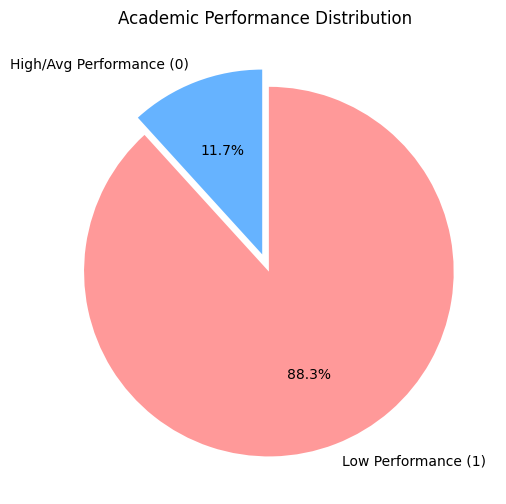

In [ ]:
import matplotlib.pyplot as plt

# Count class distribution
counts = df['Academic_Performance'].value_counts().sort_index()  # Sort by index (0 → 1)
labels = ['High/Avg Performance (0)', 'Low Performance (1)']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0.05))
plt.title('Academic Performance Distribution')

In [ ]:
import pandas as pd

df.to_csv("data\data_encoded.csv", index=False, encoding='utf-8')
